In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_features.csv')
phobia = df[['Public speaking']]

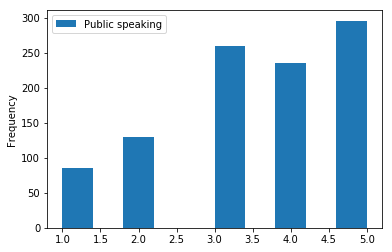

In [3]:
#Most people tend to have a fear of public speaking. Let's try to see if there is anything in common amung those who aren't afraid. 
phobia.plot(kind = 'hist')

In [4]:
less = df[(df['Public speaking'] <= 3)].dropna()
more = df[~(df['Public speaking'] <= 3)].dropna()
less.shape

(476, 28)

Text(0, 0.5, 'weight')

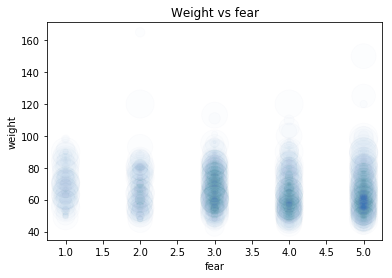

In [5]:
#Keep in mind there are less people in the more side.
area = (30 * np.random.rand(50))**2
plt.scatter(df['Public speaking'], df['Weight'], s=area, alpha=0.01)
plt.title('Weight vs fear')
plt.xlabel('fear')
plt.ylabel('weight')

In [6]:
less.head()

,Unnamed: 0,Public speaking,Movies,Thriller,Comedy,Documentary,Fantasy/Fairy tales,Music,Classical music,Rock,...,Assertiveness,Workaholism,Healthy eating,Thinking ahead,Finances,Spending on looks,Age,Weight,Number of siblings,Education
2,2,2.0,5.0,4.0,4.0,2.0,5.0,5.0,4.0,5.0,...,3.0,3.0,3.0,5.0,2.0,3.0,20.0,67.0,2.0,secondary school
6,6,3.0,4.0,1.0,5.0,3.0,5.0,5.0,2.0,3.0,...,3.0,5.0,4.0,3.0,4.0,4.0,20.0,50.0,1.0,secondary school
10,10,3.0,5.0,4.0,5.0,3.0,5.0,5.0,2.0,3.0,...,2.0,2.0,3.0,3.0,2.0,4.0,19.0,60.0,2.0,secondary school
12,12,3.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,5.0,...,5.0,4.0,3.0,5.0,4.0,3.0,24.0,55.0,10.0,college/bachelor degree
14,14,3.0,4.0,3.0,5.0,3.0,5.0,5.0,2.0,5.0,...,1.0,2.0,1.0,5.0,5.0,5.0,22.0,57.0,1.0,college/bachelor degree


Text(0.5, 1.0, 'Weight of people who fear public speaking more')

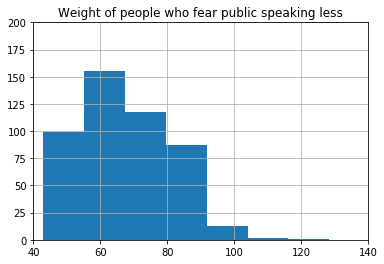

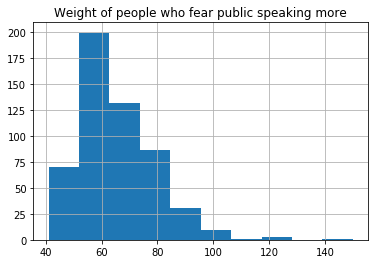

In [7]:
#Most people that fear speaking seem to be of avg weight. 
plot1 = less[['Weight']].hist()
plt.title('Weight of people who fear public speaking less')
plt.xlim(40,140)
plt.ylim(0,200)
plot2= more[['Weight']].hist()
plt.title('Weight of people who fear public speaking more')


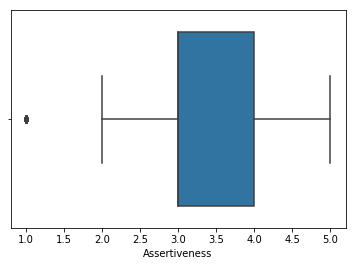

In [8]:
#So let's plot some of our other features and see what we get out of it.
#Let's look at assertivness
sns.boxplot(more['Assertiveness'])

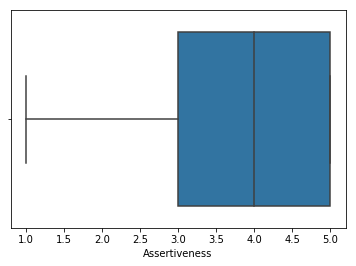

In [9]:
sns.boxplot(less['Assertiveness'])

Text(0, 0.5, 'Assertivness')

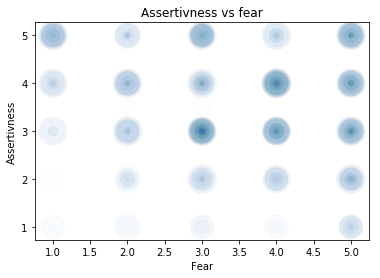

In [10]:
#We notice that people who are less assertive tend to have a greater fear of public speaking. 
#Let's make a scatter plot since this graph is losing info.
area = (30 * np.random.rand(50))**2
plt.scatter(df['Public speaking'], df['Assertiveness'], s=area, alpha=0.01)
plt.title('Assertivness vs fear')
plt.xlabel('Fear')
plt.ylabel('Assertivness')


Text(0.5, 1.0, 'Asseriveness distribution')

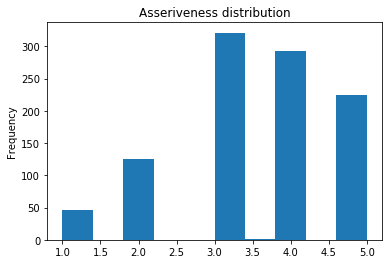

In [11]:
#Of the people who have a highfear, most seem to have a middle-high assertiveness. Why would this be?
#Let's look at the distribution of assertivness
df['Assertiveness'].plot(kind = 'hist')
plt.title("Asseriveness distribution")

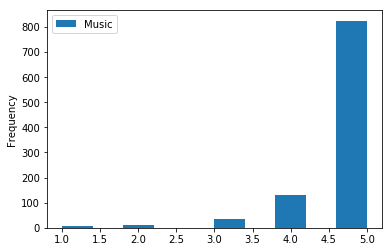

In [12]:
#This graph is shifted to the right, so there are more assertive people. The results before therefore are not that surprising. 
# Let's look at more features. Most people like music so we can't really use that
df[['Music']].plot(kind = 'hist')

Text(0, 0.5, 'Classical music')

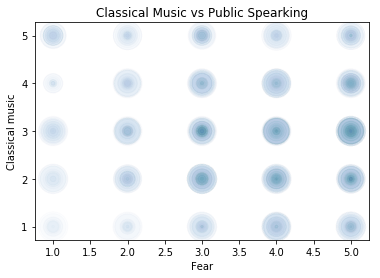

In [37]:
area = (30 * np.random.rand(50))**2
plt.scatter(df['Public speaking'], df['Classical music'], s=area, alpha=0.01)
plt.title('Classical Music vs Public Spearking')
plt.xlabel('Fear')
plt.ylabel('Classical music')

In [14]:
#It seems like of the people who don't like classical music, many have less of a fear
lessfear = df[df['Public speaking'] == 1]
print("There are " + str(len(lessfear)) + " people who don't fear public speaking")
temp = lessfear[['Public speaking', 'Classical music']]
temp['Classical music'].value_counts()

There are 86 people who don't fear public speaking


5.0    24
3.0    21
4.0    16
2.0    15
1.0    10
Name: Classical music, dtype: int64

(-1.2142856105318927,
 1.1115631060306117,
 -1.1353899980950342,
 1.1183919754758875)

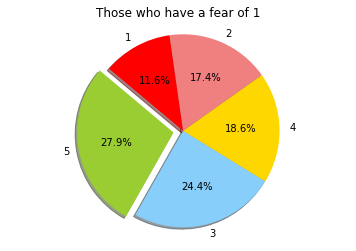

In [15]:
labels = '5', '3', '4', '2', '1'
#labels = '3', '2', '4', '5', '1'

sizes = [24, 21, 16, 15, 10]
colors = ['yellowgreen','lightskyblue', 'gold',  'lightcoral', 'red']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Those who have a fear of 1")
plt.axis('equal')


In [16]:
#And overall
temp = df[['Public speaking', 'Classical music']]
temp['Classical music'].value_counts()

3.000000    281
2.000000    249
4.000000    189
5.000000    146
1.000000    138
2.956132      7
Name: Classical music, dtype: int64

(-1.2145007450460272,
 1.1177685451472195,
 -1.1357212469841886,
 1.102977673026126)

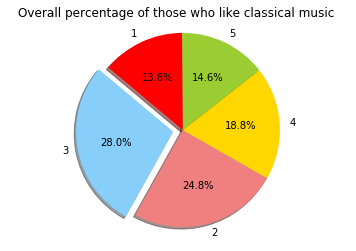

In [17]:
labels = '3', '2', '4', '5', '1'

sizes = [281, 249, 189, 146, 138]
colors = [ 'lightskyblue', 'lightcoral', 'gold','yellowgreen', 'red']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice


# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Overall percentage of those who like classical music ")
plt.axis('equal')

In [18]:
#The percentage of people who are passianate about classical music seem to have a less fear about classical music
#although not really true about those who are around that mark

Text(0, 0.5, 'Comedy')

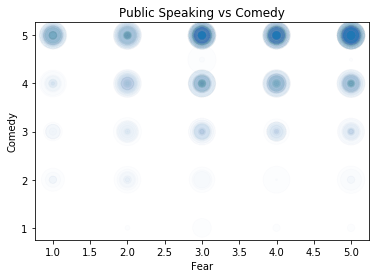

In [19]:
area = (30 * np.random.rand(50))**2
plt.scatter(df['Public speaking'], df['Comedy'], s=area, alpha=0.01)
plt.title('Public Speaking vs Comedy')
plt.xlabel('Fear')
plt.ylabel('Comedy')

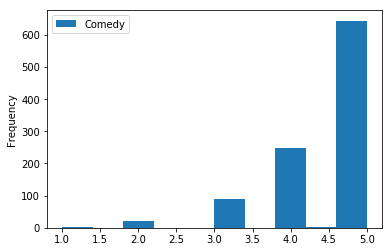

In [20]:
df[['Comedy']].plot(kind = 'hist')

In [21]:
# This appears to follow the same distribution. Let's look at another movie

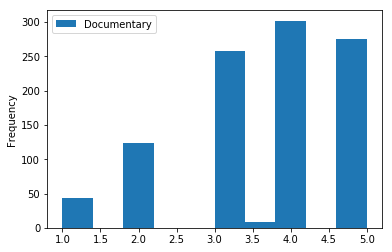

In [22]:
df[['Documentary']].plot(kind = 'hist')

Text(0, 0.5, 'Comedy')

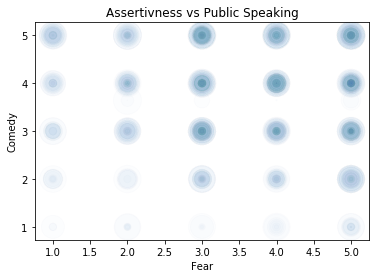

In [23]:
plt.scatter(df['Public speaking'], df['Documentary'], s=area, alpha=0.01)
plt.title('Assertivness vs Public Speaking')
plt.xlabel('Fear')
plt.ylabel('Comedy')

Text(0, 0.5, 'Fantasy/Fairy tales')

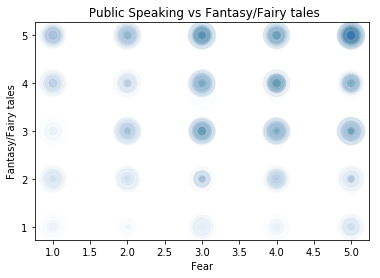

In [24]:
#This also looks normal. One more
plt.scatter(df['Public speaking'], df['Fantasy/Fairy tales'], s=area, alpha=0.01)
plt.title(' Public Speaking vs Fantasy/Fairy tales')
plt.xlabel('Fear')
plt.ylabel('Fantasy/Fairy tales')


Text(0, 0.5, 'Education')

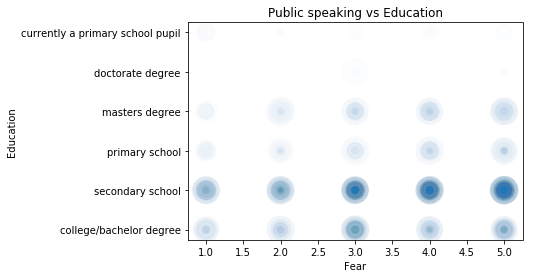

In [25]:
#Also seems to be the same distribition
df = df.dropna()
plt.scatter(df['Public speaking'], df['Education'], s=area, alpha=0.01)
plt.title('Public speaking vs Education')
plt.xlabel('Fear')
plt.ylabel('Education')

Text(0, 0.5, 'Thinking ahead')

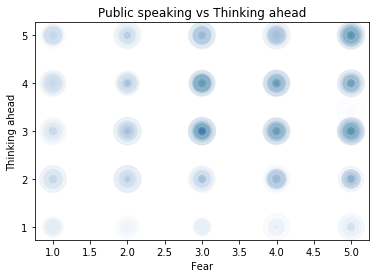

In [26]:
plt.scatter(df['Public speaking'], df['Thinking ahead'], s=area, alpha=0.01)
plt.title('Public speaking vs Thinking ahead')
plt.xlabel('Fear')
plt.ylabel('Thinking ahead')


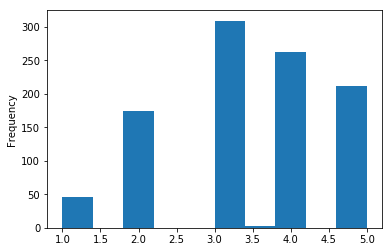

In [27]:
# It seems like people who think ahead more have a higher fear of public speaking
df['Thinking ahead'].plot(kind = 'hist') #Note those with 5 in public speaking tend to be thinking ahead more than according to the distribution

Text(0, 0.5, 'Spending on looks')

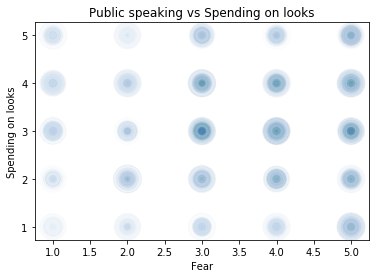

In [28]:
plt.scatter(df['Public speaking'], df['Spending on looks'], s=area, alpha=0.01)
plt.title('Public speaking vs Spending on looks')
plt.xlabel('Fear')
plt.ylabel('Spending on looks')

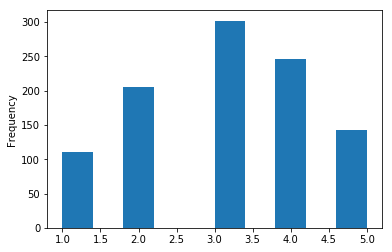

In [29]:
df['Spending on looks'].plot(kind = 'hist') # appears to follow the same distribution

Text(0, 0.5, 'Fun with friends')

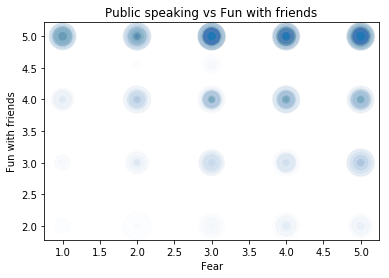

In [30]:
plt.scatter(df['Public speaking'], df['Fun with friends'], s=area, alpha=0.01)
plt.title('Public speaking vs Fun with friends')
plt.xlabel('Fear')
plt.ylabel('Fun with friends')

In [31]:
#same distribution

Text(0, 0.5, 'Personality')

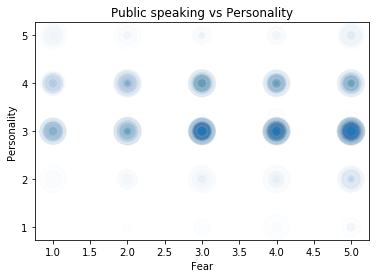

In [32]:
plt.scatter(df['Public speaking'], df['Personality'], s=area, alpha=0.01)
plt.title('Public speaking vs Personality')
plt.xlabel('Fear')
plt.ylabel('Personality')

Text(0, 0.5, 'Workaholism')

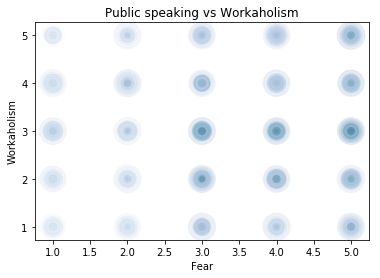

In [33]:
plt.scatter(df['Public speaking'], df['Workaholism'], s=area, alpha=0.01)
plt.title('Public speaking vs Workaholism')
plt.xlabel('Fear')
plt.ylabel('Workaholism')


Text(0, 0.5, 'Number of siblings')

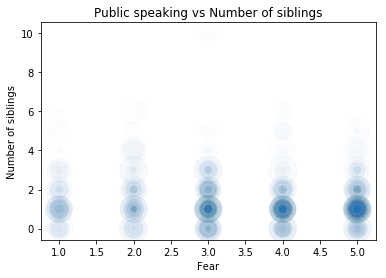

In [34]:
plt.scatter(df['Public speaking'], df['Number of siblings'], s=area, alpha=0.01)
plt.title('Public speaking vs Number of siblings')
plt.xlabel('Fear')
plt.ylabel('Number of siblings')


In [35]:
#nothing that special. 

Text(0, 0.5, 'Age')

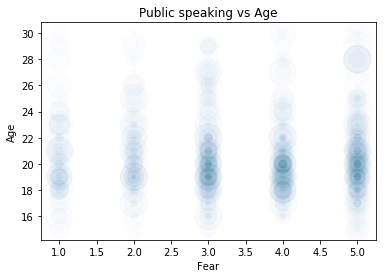

In [36]:
plt.scatter(df['Public speaking'], df['Age'], s=area, alpha=0.01)
plt.title('Public speaking vs Age')
plt.xlabel('Fear')
plt.ylabel('Age')

Summary: for the most part all the distributions seem to be around the same with a couple of differences here and there when it comes to thinking ahead, weight, and classical music. 